In [1]:
from ZebraLib.zebralib import zebraperformance as zp
from ZebraLib.zebralib.zebra_wing import Wing
import numpy as np
import matplotlib.pyplot as plt

## Tipo de arrastos: parasitas e induzidos

0.01734754068408905


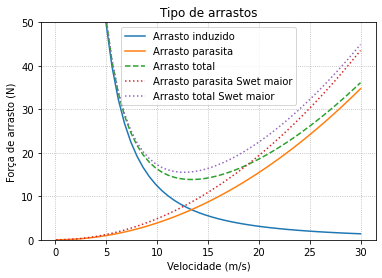

In [7]:
Zb = zp.Airplane()


V = np.linspace(0.1, 30)
Drag_ind = Zb.drag_Force_Induced(V, rho=1.08)
Drag_paras = Zb.drag_Force_Parasitic(V, rho=1.08)

fig, ax = plt.subplots() #criando a figura

#Configurando o gráfico
ax.set(title='Tipo de arrastos', xlabel='Velocidade (m/s)', ylabel='Força de arrasto (N)')  

#Adcionando linhas a figura
ax.plot(V, Drag_ind, label='Arrasto induzido') 
ax.plot(V, Drag_paras, label='Arrasto parasita')
ax.plot(V, Drag_paras+Drag_ind, '--',label='Arrasto total')

Zb.C_D0 = 0.1
Drag_paras = Zb.drag_Force_Parasitic(V, rho=1.08)
ax.plot(V, Drag_paras, linestyle='dotted', label='Arrasto parasita Swet maior')
ax.plot(V, Drag_paras+Drag_ind,  linestyle='dotted', label='Arrasto total Swet maior')

ax.set_ylim(0, 50)
ax.grid(linestyle='dotted')   # Colocar grid na figura
ax.legend() # Mostrar legenda

## Velocidade com a variação da densidade do ar 

0.01734754068408905


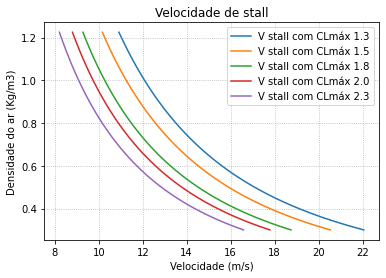

In [8]:
from ZebraLib.zebralib import zebraperformance as zp
from ZebraLib.zebralib.zebra_wing import Wing
import numpy as np
import matplotlib.pyplot as plt

Zb = zp.Airplane()
rho = np.linspace(0.3, 1.225)

fig, ax = plt.subplots()
ax.set(title='Velocidade de stall', xlabel='Velocidade (m/s)', ylabel='Densidade do ar (Kg/m3)')

ax.plot(Zb.veloc_Req(1.3, rho), rho, label='V stall com CLmáx 1.3')
ax.plot(Zb.veloc_Req(1.5, rho), rho, label='V stall com CLmáx 1.5')
ax.plot(Zb.veloc_Req(1.8, rho), rho, label='V stall com CLmáx 1.8')
ax.plot(Zb.veloc_Req(2.0, rho), rho, label='V stall com CLmáx 2.0')
ax.plot(Zb.veloc_Req(2.3, rho), rho, label='V stall com CLmáx 2.3')

plt.grid(linestyle='dotted')
plt.legend()
plt.show()

0.01734754068408905


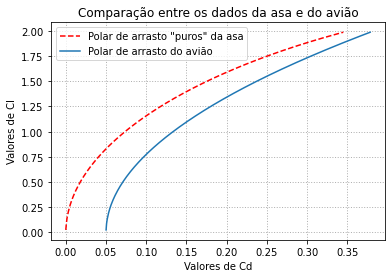

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
g=9.81

Zb = zp.Airplane(Swet=6.272)

#=============================   FIGURA 1 ARRASTO DADOS E INTERPOLAÇÃO DA ASA   =======================

#INTERPOLAÇÃO PARA 500 ELEMENTOS
alpha, Cl, Cd = Zb.import_WingData('D:/UNESP/AeroDesign/Códigos_Python/Dados/dados_asas.xlsx')

#PLOTAGEM
fig, ax = plt.subplots()
ax.set(title='Comparação entre os dados da asa e do avião', xlabel='Valores de Cd'
        ,ylabel='Valores de Cl')

ax.plot(Cd, Cl,'--',color='red', label='Polar de arrasto "puros" da asa')
ax.plot(Zb.drag_Coef(Cl), Cl, label='Polar de arrasto do avião')

ax.set_xlim()
ax.legend()
ax.grid(linestyle='dotted', linewidth=1)

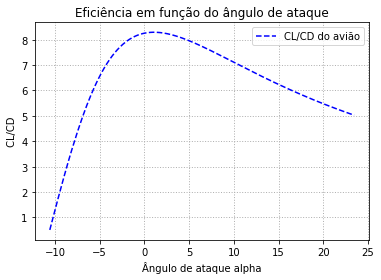

In [38]:
Cd1 = Cd + Zb.C_D0

fig, ax = plt.subplots()
ax.set(title='Eficiência em função do ângulo de ataque', xlabel='Ângulo de ataque alpha'
        , ylabel=' CL/CD ')

ax.plot(alpha, Cl/Cd1,'--', color='blue', label='CL/CD do avião')

ax.legend()
ax.grid(linestyle='dotted', linewidth=1)

## Plotando trações e potências para atmosferas diferentes 


0.01734754068408905


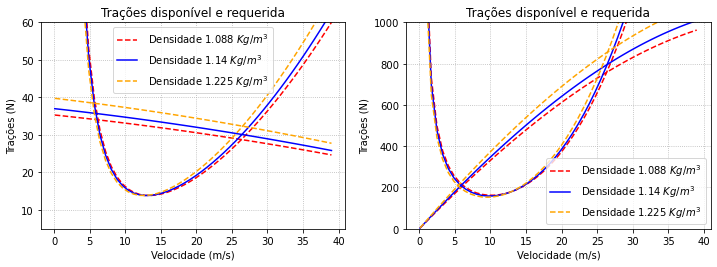

In [39]:
Zb = zp.Airplane()

#Vetor de velocidade e densidades 
V = np.linspace(0.1, 39)
densidades = np.array((1.088, 1.14, 1.225))

#Colocar estilos no gráfico
Cores = np.array(('red', 'blue', 'orange'))
Lines = np.array(('--','-','--'))

#Criando o objeto ax (gráfico) com 2 subplots 
fig, (ax, ax2) = plt.subplots(1, 2,  figsize=(12,3.8))
ax.set(title='Trações disponível e requerida', xlabel='Velocidade (m/s)', ylabel='Trações (N)')
ax2.set(title='Trações disponível e requerida', xlabel='Velocidade (m/s)', ylabel='Trações (N)')

#iterando para cada avião, cor e line
for dens, cor, line  in zip(densidades, Cores, Lines):
    
    #Construir a linha do subplot 1 - Trações
    ax.plot(V, Zb.trac_Available(V, rho=dens), color=cor, ls=line)
    ax.plot(V, Zb.trac_Req(V, rho=dens), color=cor, ls=line, label=f' Densidade {dens} $Kg/m^3$')
    
    #Construir a linha do subplot 2 - Potências
    ax2.plot(V, Zb.pot_Available(V, rho=dens), color=cor, ls=line,)
    ax2.plot(V, Zb.pot_Req(V, rho=dens), color=cor, ls=line,  label=f' Densidade {dens} $Kg/m^3$')
   
    
ax.set_ylim(5,60)
ax2.set_ylim(0,1000)
ax.legend()
ax2.legend()
ax.grid(linestyle='dotted')
ax2.grid(linestyle='dotted')

##  Plotando trações e potências para aviões com áreas molhadas diferentes   


0.01734754068408905
0.01734754068408905
0.01734754068408905
0.01734754068408905


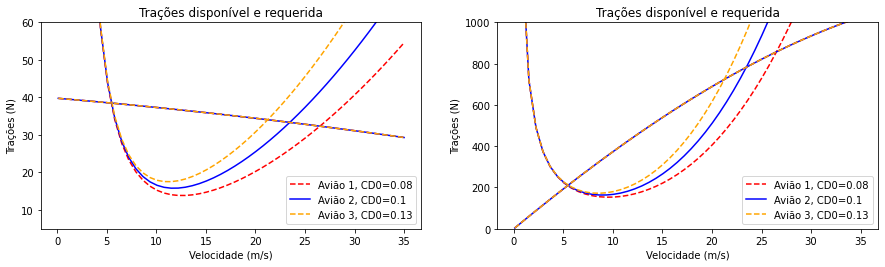

In [40]:
#Instanciando vários objetos do tipo Airplane
Avião_1 = zp.Airplane('Avião 1', Swet=10)
Avião_2 = zp.Airplane('Avião 2',Swet=13)
Avião_3 = zp.Airplane('Avião 3',Swet=16)
Avião_4 = zp.Airplane('Avião 4',Swet=18)

#Criando uma array de objetos pra iteração
Aviões = np.array((Avião_1, Avião_2, Avião_3, Avião_4))

V = np.linspace(0.1, 35)

Cores = np.array(('red', 'blue', 'orange'))
Lines = np.array(('--','-','--'))

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15,3.8))
ax.set(title='Trações disponível e requerida', xlabel='Velocidade (m/s)', ylabel='Trações (N)')
ax2.set(title='Trações disponível e requerida', xlabel='Velocidade (m/s)', ylabel='Trações (N)')

#Calculando as trações e potências para cada avião da array
for cor, line, Zb  in zip(Cores, Lines, Aviões):
    
    ax.plot(V, Zb.trac_Available(V, rho=dens), color=cor, ls=line)
    ax.plot(V, Zb.trac_Req(V, rho=dens), color=cor, ls=line, label=f'{Zb.name}, CD0={round(Zb.C_D0,2)}')
    
    ax2.plot(V, Zb.pot_Available(V, rho=dens), color=cor, ls=line,)
    ax2.plot(V, Zb.pot_Req(V, rho=dens), color=cor, ls=line,  label=f'{Zb.name}, CD0={round(Zb.C_D0,2)}')

ax.set_ylim(5,60)
ax2.set_ylim(0,1000)
ax.legend()
ax2.legend()

## Esforço estrutural da asa 

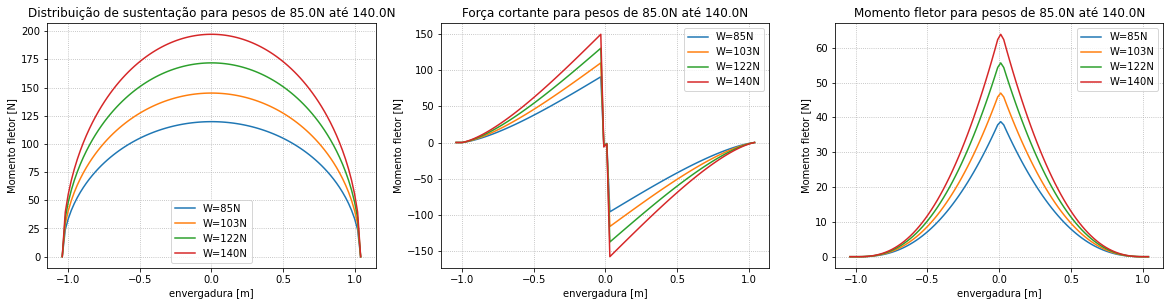

In [15]:
Zb = Wing(S=0.988, b=2.08, CLmax=1.7) # Objeto Asa 

W = np.linspace(85, 140, 4)   # Vetores com vários pesos

#Formatando o gráfico - titulo e nomes dos eixos
fig, ax = plt.subplots(figsize=(20, 4.5),nrows=1, ncols=3, sharex=True)
ax[1].set(title=f'Força cortante para pesos de {W.min()}N até {W.max()}N',
        xlabel='envergadura [m]', ylabel='Momento fletor [N]')
ax[2].set(title=f'Momento fletor para pesos de {W.min()}N até {W.max()}N',
        xlabel='envergadura [m]', ylabel='Momento fletor [N]')
ax[0].set(title=f'Distribuição de sustentação para pesos de {W.min()}N até {W.max()}N',
         xlabel='envergadura [m]', ylabel='Momento fletor [N]')

#Iterando para vários pesos
for w in (W):
    w = round(w)
    L = Zb.distElip_Sust(w)
    ax[0].plot(Zb.y, L, label=f'W={w}N')
    
    V = Zb.força_Cortante(w)
    ax[1].plot(Zb.y, V, label=f'W={w}N')

    M = Zb.moment_Fletor(V)
    ax[2].plot(Zb.y, M, label=f'W={w}N')
    #ax[1].fill_between(Zb.y, M, color='cyan')

for x in ax:
    x.legend()
    x.grid(linestyle='dotted')

In [173]:
import numpy as np

pho=1.088
v=15
c= 0.392
mi=1.7894E-5

Re = (pho*v*c)/mi 

#Re = 38.21*((c/0.1015E-5)**1.053)

Cf = 0.455/(np.log10(Re)**2.58)
Cf = 0.0071
Re, Cf, Cf*(3/0.684)*1.3

(357518.72135911486, 0.0071, 0.04048245614035088)

In [174]:
A = np.pi*((0.09/2)**2)
f = 0.4/((4/np.pi)*A)

FF = 1 + (60/(f**3)) + (f/400)

A, f, FF

(0.0063617251235193305, 49.38271604938272, 1.1239550160609568)

In [175]:
Q=1.5
Cd = ((Cf*FF*Q*0.1258) + (Cf*FF*Q*1.368) + )/0.684
Cd*1.3

0.033984293306172905